## Question 1

Using the Ising Model simulation developed in lecture, consider a system that starts
out with a magnetization close to 0. (Initialize your lattice by assuming each spin has
an equal probability of being up or down.) Estimate the probability that the system
spontaneously magnetizes. Let’s call the material magnetized if the average normalized
magnetization over $1000$ sweeps of the lattice is greater than $90%$, i.e. $|M_{\text{avg}}| > 0.9$
(absolute value because spins could be mostly up or mostly down). Assume there is no
external magnetic field $(H = 0)$.

$\\$
$\\$
To calculate the probability, you will need to run this simulation for $n$ trials, and
calculate for what fraction of those trials the material becomes magnetized. One trial
is $1000$ sweeps over the lattice, after initializing the lattice to have a magnetization
close to zero. Please turn in a text file with your numerical results for the
probabilities below.

$\\$
$\\$
(a) Compute the probability for different temperatures, $T = \frac{1}{kB}$ vs $T = \frac{3}{kB}$ , for a
$20 \times 20$ lattice.

$\\$
$\\$
(b) Compute the probability for different lattice size, 10 × 10 vs 20 × 20 vs 40 × 40,
for a temperature of T = 1/kB .

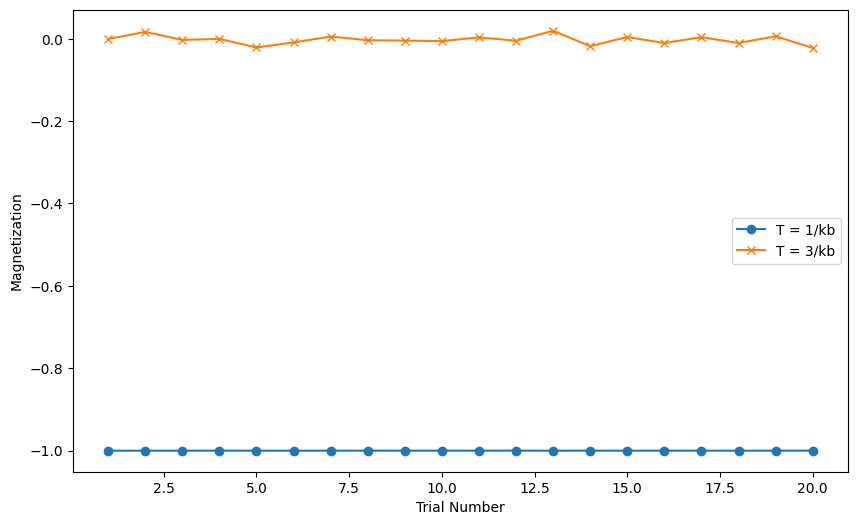

In [26]:
import random as rd
import numpy as np
import math
import matplotlib.pyplot as plt

Temps = [1, 3]
#print("Temperatures: ",T)

ntrials=20
nsweeps=1000

SIMULATION_DATA = {}
for temp in Temps:
    SIMULATION_DATA[temp] = []

def Espin(a):
    Jconst=1
    #get number of rows and columns from input array
    row,col=a.shape
    s=0
    for i in range(row):#loop over rows
        for j in range(col):#sum over neighboring pairs in row i
            c=j+1#calculate index of the column to the right of current column
            #if we've reached the last column
            #use the first column as the column to the right of the last entry
            if c==col:
                c=0
            s+=a[i][j]*a[i][c]
    for j in range(col):#loop over columns
        for i in range(row):#sum over neighboring pairs in column j
            r=i+1#calculate index of row below the current row
            #if we've reached the last row
            #use the first row as the row below the last entry
            if r==row:
                r=0
            s+=a[i][j]*a[r][j]
    return -Jconst*s

def prob(d):
    return math.exp(-d/T)

def magnetization(a):
    row,col=a.shape
    return np.sum(a)/(row*col)


#variable to store the average magnetization for each temperature
M=[]

for trial in range(ntrials):
    for T in Temps:
        #Define starting lattice
        n=20
        lattice = np.ones([n,n],int)
        for i in range(n):
            for j in range(n):
                lattice[i][j] -= 2
        Ecurrent=Espin(lattice)
        mag=magnetization(lattice)
        for k in range(nsweeps):
            #Loop over each spin in lattice
            for i in range(n):
                for j in range(n):
                    rup=i-1#look at row above
                    if rup==-1:
                        rup=n-1
                    rdown=i+1# look at row below
                    if rdown==n:
                        rdown=0
                    cleft=j-1#look at column to the left
                    if cleft==-1:
                        cleft=n-1
                    cright=j+1#look at column to the right
                    if cright==n:
                        cright=0
                    deltaE = 2*lattice[i][j]*(lattice[rup][j] + lattice[rdown][j] + lattice[i][cleft] + lattice[i][cright])
                    if deltaE<0:#flip it
                        lattice[i][j] *= -1
                        Ecurrent += deltaE
                    else:#maybe we flip it?
                        if rd.random()<prob(deltaE):
                            lattice[i][j] *= -1
                            Ecurrent += deltaE
            mag+=magnetization(lattice)
        SIMULATION_DATA[T].append(mag/nsweeps)

# plt.plot(Temps,M,lw=0,marker="o")
# label=r'Temperature (1/$k_B$)'
# plt.xlabel(label)
# plt.ylabel("Magnetization")
# plt.ylim(-0.2,1.1)
# plt.savefig("MvsT.png")
# plt.show()

index = list(range(1, ntrials + 1))

plt.figure(1, figsize=(10, 6))

markers = ['o', 'x']
for i  in range(len(Temps)):
    plt.plot(index, SIMULATION_DATA[Temps[i]], label = f'T = {Temps[i]}/kb', marker = markers[i])

plt.xlabel('Trial Number')
plt.ylabel('Magnetization')
plt.legend()

plt.show()


In [19]:
nums = [1, 4]

test = {}
for num in nums:
    test[num] = []


for i in range(100):
    for num in nums:
        entry = rd.randint(1, 100)
        test[num].append(entry)


print(test[4])

[12, 74, 77, 100, 97, 78, 36, 68, 39, 46, 77, 29, 65, 89, 3, 53, 60, 14, 85, 73, 97, 51, 22, 24, 72, 25, 98, 38, 6, 87, 64, 12, 72, 50, 38, 32, 65, 28, 75, 93, 2, 35, 47, 14, 10, 99, 75, 11, 67, 54, 21, 45, 28, 54, 50, 14, 71, 96, 58, 72, 62, 92, 25, 38, 19, 30, 91, 29, 94, 76, 36, 22, 93, 21, 97, 85, 65, 77, 91, 6, 55, 56, 100, 64, 100, 37, 41, 97, 23, 61, 30, 11, 69, 92, 30, 33, 4, 69, 58, 2]


In [8]:
lattice

array([[0.90152613, 0.19074591, 0.72072126],
       [0.17968743, 0.21283355, 0.08144884],
       [0.64158592, 0.32043591, 0.72436636]])

In [10]:
for

[0.90152613 0.19074591 0.72072126]
[0.17968743 0.21283355 0.08144884]
[0.64158592 0.32043591 0.72436636]
[0.90152613 0.19074591 0.72072126]
[0.17968743 0.21283355 0.08144884]
[0.64158592 0.32043591 0.72436636]
[0.90152613 0.19074591 0.72072126]
[0.17968743 0.21283355 0.08144884]
[0.64158592 0.32043591 0.72436636]
